# Don's conclusions

#### Urban fares account for nearly 2/3 of Pyber's total revenue 62.7%
#### Rural fares tend to be higher on average, which would suggest rural trips may be further on average
#### Strong correlation between number of rides and average fare (by city).
##### Cities with more rides have lower average fares, but more drivers available on average 


In [173]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
ride_merge_d = pd.merge(ride_data,city_data, on="city", how="left")

# Display the data table for preview
ride_merge_d.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

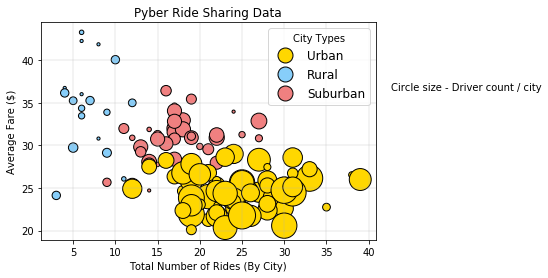

In [174]:
# Obtain the x and y coordinates for each of the three city types

#Group by city and type
rides_city = ride_merge_d.groupby(["type","city"])

#X-AXIS - Count how many rides occured in each city
ride_counts = rides_city["ride_id"].count()

#Y-AXIS - Calculate average fare per ride (by city)
avg_fare = rides_city["fare"].mean()

ride_city = pd.DataFrame({"Total Rides":ride_counts,
                         "Average Fare":avg_fare})
ride_city.reset_index()


#Add driver count by merging original ride data with new data
    #Create new dataframe (from original one) with only city and driver_count columns
city_dcount = ride_merge_d[["city","driver_count","type"]]

ride_city_full = pd.merge(ride_city,city_dcount,on ="city", how="left")
ride_city_full.drop_duplicates("city",inplace=True)

#Define driver count variable for scatter plot bubble size and type variable for color
dcount = ride_city_full["driver_count"]

#Define variable to hold list of each city type

# city_type = ride_city_full["type"].unique().tolist()
city_type = ride_city_full["type"].unique()
city_type

#Define colors column with city type number to color scatter plot bubbles by city type 

colors2 = ride_city_full["type"].replace(
                                        {"Urban":"gold",
                                         "Rural":"lightskyblue",
                                         "Suburban":"lightcoral"})

plt.scatter(ride_counts, avg_fare, s=10*dcount, c = colors2 ,edgecolors="black",marker="o")



#Create legend handles using matplotlib artists
urban_marker = mlines.Line2D([],[],linestyle="None" ,color='gold',marker="o",markeredgecolor = "black", markersize = 15,label = "Urban")
rural_marker = mlines.Line2D([],[],linestyle="None" ,color='lightskyblue',marker="o",markeredgecolor = "black", markersize = 15,label = "Rural")
suburban_marker = mlines.Line2D([],[],linestyle="None" ,color='lightcoral', marker="o",markeredgecolor = "black", markersize = 15,label = "Suburban")

#Pass handles to legend
plt.legend(handles = [urban_marker,rural_marker,suburban_marker],fontsize="large",title = "City Types")

#CHART FORMATING
#Add title and axis labels
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (By City)")
plt.ylabel("Average Fare ($)")

#Add gridlines
plt.grid(which="major",linewidth = 0.3)

#Add text label
plt.annotate("Circle size - Driver count / city",xy=(350,150),xycoords="axes points")

#Save Figure
plt.savefig("Don_Pyber_Bubble.png")

plt.show()


## Total Fares by City Type

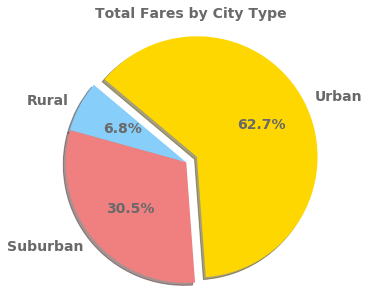

<Figure size 360x360 with 0 Axes>

In [255]:
# Calculate Type Percents

#Calculate total fare

#Group original data frame by city type
rides_city_type = ride_merge_d.groupby(["type"])

#Sum rows in grouped dataframe (by column)
# fares_city_type = rides_city_type.sum().reset_index()
fares_city_type = rides_city_type.sum()

#Calculate total fare
total_fare = fares_city_type["fare"].sum()
total_fare

#Calculate fare percentage by city type

rural_fares = fares_city_type.loc["Rural","fare"] / total_fare

urban_fares = fares_city_type.loc["Urban","fare"]/ total_fare

suburban_fares = fares_city_type.loc["Suburban","fare"]/ total_fare

#Create text font dictionary for pie chart text formatting
font = {"color":"dimgrey",
        "weight":"bold",
        "fontsize":14,}

#Create pie chart
plt.pie([rural_fares,suburban_fares,urban_fares],
        explode = explode,
        labels = city_type, 
        colors=(colors2.unique()),
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 140,
        textprops = font,)


plt.axis("equal")

plt.title("Total Fares by City Type", fontdict = font)

plt.rcParams['figure.figsize'] = [5, 5]

plt.savefig("Don_Pyber_Pie_CityTypebyFare.png",bbox_inches="tight")

plt.show()

plt.tight_layout()


In [195]:
# Show Figure
plt.show()

## Total Rides by City Type

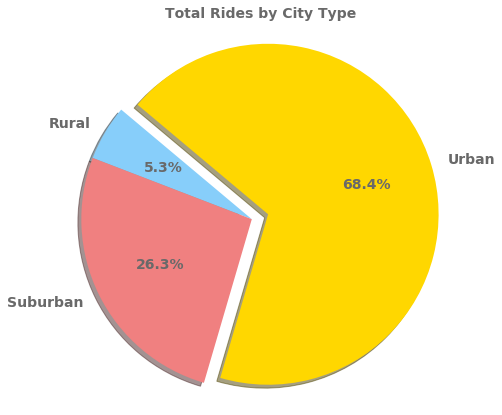

<Figure size 360x360 with 0 Axes>

In [254]:
# Calculate Type Percents

#Calculate total rides
total_rides = ride_merge_d["ride_id"].count()

#Calculate city type percents
rural_rides = ride_merge_d["type"].value_counts()['Rural'] / total_rides
suburban_rides = ride_merge_d["type"].value_counts()['Suburban'] / total_rides
urban_rides = ride_merge_d["type"].value_counts()['Urban'] / total_rides


#Plot pie chart

explode = (0,0,0.1)
           
plt.pie([rural_rides,suburban_rides,urban_rides],
        explode = explode,
        labels = city_type, 
        colors=(colors2.unique()),
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 140,
        textprops = font,)

plt.axis("equal")

plt.title("Total Rides by City Type", fontdict = font)

plt.rcParams['figure.figsize'] = [5, 5]

plt.savefig("Don_Pyber_Pie_CityType.png",bbox_inches="tight")

plt.show()

plt.tight_layout()

# Save Figure


## Total Drivers by City Type

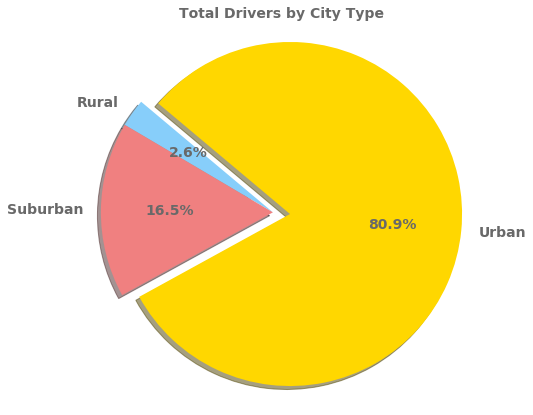

<Figure size 504x504 with 0 Axes>

In [253]:
#Use dataframe created in bubble chart exercise above which is grouped by city
#------this data frame was created in line 22 of bubble chart exercise 

#Calculate total number of drivers
total_drivers = ride_city_full["driver_count"].sum()

#Group dataframe by city type
drivers_df = ride_city_full.groupby("type").sum()

#Calculate driver percentage by city type
rural_drivers = drivers_df.loc["Rural","driver_count"] / total_drivers
suburban_drivers = drivers_df.loc["Suburban","driver_count"] / total_drivers
urban_drivers = drivers_df.loc["Urban","driver_count"] / total_drivers

plt.pie([rural_drivers,suburban_drivers,urban_drivers],
        explode = explode,
        labels = city_type, 
        colors=(colors2.unique()),
        autopct = "%1.1f%%",
        shadow = True,
        startangle = 140,
        textprops = font,)

plt.axis("equal")

plt.title("Total Drivers by City Type", fontdict = font)

plt.rcParams['figure.figsize'] = [7, 7]

plt.savefig("Don_Pyber_Pie_DriversByCityType.png",bbox_inches="tight")

plt.show()

plt.tight_layout()


